# Online Retail II EDA
- Source: https://archive.ics.uci.edu/dataset/502/online+retail+ii

Dataset "Online Retail II" là bộ dữ liệu giao dịch bán lẻ trực tuyến thực tế từ một công ty tại UK, chuyên bán quà tặng, bao gồm khoảng 1.067.371 bản ghi (instances) và 8 thuộc tính (attributes). Dữ liệu bao quát từ 01/12/2009 đến 09/12/2011, phù hợp cho các nhiệm vụ như phân loại, hồi quy, phân cụm, hoặc phân tích thời gian. Các thuộc tính chính bao gồm:

- InvoiceNo: Mã hóa đơn (nominal, có thể bắt đầu bằng 'C' cho hóa đơn hủy).
- StockCode: Mã sản phẩm (nominal).
- Description: Mô tả sản phẩm (nominal).
- Quantity: Số lượng sản phẩm (numeric).
- InvoiceDate: Ngày và giờ hóa đơn (datetime).
- UnitPrice: Giá đơn vị (numeric, đơn vị £).
- CustomerID: Mã khách hàng (nominal).
- Country: Quốc gia khách hàng (nominal).

Dataset có missing values (chủ yếu ở CustomerID và Description), và bạn cần xử lý chúng. Dữ liệu được lưu dưới dạng file Excel (.xlsx) khoảng 43.5 MB.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

## I. Read file

In [2]:
## Read both sheets from the Excel file
# xls = pd.ExcelFile('../data/raw/online_retail_II.xlsx')
# df1 = pd.read_excel(xls, 'Year 2009-2010')
# df2 = pd.read_excel(xls, 'Year 2010-2011')

## Concatenate the two dataframes
# df = pd.concat([df1, df2], ignore_index=True)

# Read file csv
df = pd.read_csv("../data/raw/data_online_retail_II.csv")

# Display basic info about the combined dataset
print("\n=== Dataset Info ===")
print(df.info())

print("=== Data Head ===")
print(df.head())

# Check missing
print("\n=== Sum Data Null ===")
print(df.isnull().sum())

print("\n=== Data Describe ===")
print(df.describe())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None
=== Data Head ===
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE     

## II. Data Pre-processing

### 1. Checking `Description` null have any meanful ?

In [3]:
df['Description'].isna().value_counts()

Description
False    1062989
True        4382
Name: count, dtype: int64

#### 1.1 Checking `Description` have null value that have `Customer ID` null or not

In [4]:
df_check = df[(df['Description'].isna()) & (df['Customer ID'].isna())]
df_check

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


=> All `Description` null value have `Customer ID` null       

#### 1.2 Checking Total `Quantity` of `Description` null

In [5]:
df_check['Quantity'].sum()

np.int64(-75643)

=> All `Description` null value have negative value of Total `Quantity`

**From 2 conditions above =>** temporary drop `Description` null value

In [6]:
df = df[~df['Description'].isna()]

### 2. Checking `Description` insight

#### 2.1 Get unique `Description` rows

In [7]:
# Lấy unique descriptions
desc_unique = df['Description'].unique()

#### 2.2 Check `Description` have 1 character in lowercase

In [8]:
desc_check = {str(d) for d in desc_unique if sum(1 for c in str(d) if c.islower()) == 1}
desc_check

{' SET Of 6 SOLDIER SKITTLES',
 '17129c',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'BAG 125g SWIRLY MARBLES',
 'BAG 250g SWIRLY MARBLES',
 'BAG 500g SWIRLY MARBLES',
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'FRENCH BLUE METAL DOOR SIGN No',
 'FRENCH BLUE METAL DOOR SIGN, No',
 'NUMBER TILE COTTAGE GARDEN No',
 'NUMBER TILE COTTAGE GARDEN, No',
 'NUMBER TILE VINTAGE FONT No ',
 'NUMBER TILE VINTAGE FONT, No ',
 'POLYESTER FILLER PAD 30CMx30CM',
 'POLYESTER FILLER PAD 65CMx65CM'}

=> `Description` with 1 character in lowercase is meanful => Need to be kept

#### 2.3 Check `Description` have 2 characters in lowercase

In [9]:
desc_check = {str(d) for d in desc_unique if sum(1 for c in str(d) if c.islower()) == 2}
desc_check

{'CHROME EURO HOOK 20cm'}

=> Still meanful => Keep

#### 2.4 Check `Description` have 3 characters in lowercase

In [10]:
desc_check = {str(d) for d in desc_unique if sum(1 for c in str(d) if c.islower()) == 3}
print(desc_check)
df_check = df[df['Description'].isin(desc_check)]
print(f"Number of rows in main data:{df_check.shape[0]}")
print('Total Quantity of these rows:', df_check['Quantity'].sum())

{'wet?', 'POLYESTER FILLER PAD 60x40cm', 'POLYESTER FILLER PAD 45x30cm', 'POLYESTER FILLER PAD 45x45cm', 'wet', 'POLYESTER FILLER PAD 40x40cm'}
Number of rows in main data:844
Total Quantity of these rows: 9338


=> Notice that `Description` with value "wet" and "wet?" unmeanful => Remove this

In [11]:
df_check = df[df['Description'].isin(['wet', 'wet?'])]
print(f"Number of rows in main data: {df_check.shape[0]}")
print('Total Quantity of these rows:', df_check['Quantity'].sum())
df_check

Number of rows in main data: 3
Total Quantity of these rows: -401


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
17428,490766,51008,wet,-200,2009-12-08 11:06:00,0.0,NaN,United Kingdom
1040111,579734,84859C,wet?,-153,2011-11-30 14:25:00,0.0,NaN,United Kingdom
1058184,580990,21109,wet,-48,2011-12-06 16:54:00,0.0,NaN,United Kingdom


#### 2.5 Check `Description` have 4 characters in lowercase

In [12]:
desc_check = {str(d) for d in desc_unique if sum(1 for c in str(d) if c.islower()) == 4}
print(desc_check)
df_check = df[df['Description'].isin(desc_check)]
print(f"Number of rows in main data:{df_check.shape[0]}")
print('Total Quantity of these rows:', df_check['Quantity'].sum())

{'?lost', 'lost', 'lost??', 'FOLK ART GREETING CARD,pack/12', 'temp', 'Rusty ', 'show', 'gone', 'ebay', 'test', '???lost', 'Found', 'lost?', 'THE KING GIFT BAG 25x24x12cm'}
Number of rows in main data:75
Total Quantity of these rows: -4338


In [13]:
df_check = df[df['Description'].isin(['THE KING GIFT BAG 25x24x12cm', 'FOLK ART GREETING CARD,pack/12'])]
print(f"Number of rows in main data: {df_check.shape[0]}")
df_check['Quantity'].sum()

Number of rows in main data: 44


np.int64(154)

=> Many `Description` have unmeanful value, just a few rows that have meanful value => Can remove together

#### 2.6 Check `Description` have 5 more characters in lowercase

In [14]:
desc_check = {str(d) for d in desc_unique if sum(1 for c in str(d) if c.islower()) >= 5}
print(desc_check)
df_check = df[df['Description'].isin(desc_check)]
print(f"Number of rows in main data: {df_check.shape[0]}")
print('Total Quantity of these rows:', df_check['Quantity'].sum())

{'amazon adjustment', 'dirty, torn, thrown away.', 'wet damages', 'Glow In The Dark Shot Glasses ', 're-adjustment', 'Sold as 1 on dotcom', 'came coded as 20713', 'Mailout', 'discoloured', 'Damp and rusty', 'broken zips', 'Given away', "thrown away-can't sell.", 'had been put aside', 'Wet, rusty-thrown away', 'stock take', 'Wet pallet-thrown away', 'short', 'amazon', 'add stock to allocate online orders', 'Sold as A/B', '*USB Office Glitter Lamp', "thrown away-can't sell", 'Lighthouse Trading zero invc incorr', 'amazon adjust', 'checked', '?sold as sets?', 'missing', 'crushed ctn', '85123a mixed', 'OOPS ! adjustment', 'Ebay sales by the box.', 'wrongly sold sets', 'invoice 506647', 'damages?', 'crushed', 'alan hodge cant mamage this section', 'missing (wrongly coded?)', 'wet boxes', ' Bank Charges', 'showroom', 'dirty', 'Found in w/hse', 'broken', 'stock credited from royal yacht inc', 'damages/credits from ASOS.', 'adjustment', 'Breakages', 'Adjustment by john on 26/01/2010 16', 'sold

=> Almost of them are unmeanful => Remove

#### 2.7 Checking `Description` have few words

In [15]:
desc_word_check = {str(d) for d in desc_unique if len(str(d).split()) == 1}
print(desc_word_check)

{'lost??', '21494', 're-adjustment', 'Mailout', 'discoloured', '???lost', 'SOMBRERO ', 'short', 'amazon', 'wet?', '?lost', 'checked', 'gone', 'missing', '17129c', 'damages?', 'lost?', 'crushed', 'showroom', 'dirty', '??', 'broken', 'Rusty ', 'adjustment', 'Breakages', 'amendment', 'MISSING', 'Discount', '22467', 'damaged?', 'FBA', 'ebay', '????missing', 'dotcom', 'faulty', 'samples', 'test', 'FOUND', 'damages/dotcom?', 'Amazon', 'SAMPLES', '???', 'missing?', 'Missing', 'Damaged', 'POSTAGE', 'returned', 'damages/display', 'Display', 'wet', 'damaged/dirty', 'damaged', 'display', 'mouldy', '?missing', 'lost', '????damages????', 'adjust', '22719', 'found', 'missings', 'damages', '?', 'Damages', 'WET/MOULDY', 'wet/rusty', 'DAMAGED', 'Dotcom', '?display?', 'Damages/samples', 'counted', 'mailout', 'show', '20713', 'CHECK', 'AMAZON', 'Manual', 'cracked', 'CARRIAGE', 'samples/damages', 'mailout ', 'check?', 'wet/smashed/unsellable', 'update', 'MIA', 'Dagamed', 'check', 'Adjustment', 'Crushed', 

=> Almost of them are unmeanful => Remove

In [16]:
desc_word_check = {str(d) for d in desc_unique if len(str(d).split()) == 2}
print(desc_word_check)

{'amazon adjustment', 'wet damages', 'WRAP CAROUSEL', 'WRAP BLIZZARD', 'DECOUPAGE,GREETING CARD,', 'broken zips', 'RIVIERA NECKLACE', 'Given away', 'CINDERELLA CHANDELIER ', 'KEY-RING CORKSCREW', 'TOYBOX  WRAP ', 'DOORMAT FRIENDSHIP ', 'stock take', 'HANGING FLOWERS+MIRROR,CLEAR', 'FLOWER WINDMILL', 'SEASIDE FRISBEE ', 'amazon adjust', 'BATHROOM HOOK', 'DOORMAT TOPIARY', 'crushed ctn', '85123a mixed', 'SKULLS  STICKERS', 'invoice 506647', 'SKULLS TAPE', ' Bank Charges', 'wet boxes', 'WRAP, CAROUSEL', 'VIPPASSPORT COVER ', 'FLAMINGO LIGHTS', 'DOORMAT HEARTS', 'DAISY SKETCHBOOK ', 'wrong barcode', 'eurobargain invc/credit', 'DOTTY PLACEMATS ', 'CHRYSANTHEMUM NOTEBOOK', 'TUMBLER, BAROQUE', 'SPACE OWL', 'OWL DOORSTOP', 'Dotcom multiple', 'wet cartons', 'HEART CALCULATOR', 'amazon sales', 'wet rusty', 'NEWSPAPER STAND', 'John Lewis', 'website fixed', 'reverse mistake', 'rex use', ' ANIMAL STICKERS', 'cant find', 'WRAP COWBOYS  ', 'SWEETIES  STICKERS', 'POPCORN HOLDER', 'Thrown away-rusty', 

=> Almost of them are unmeanful => Remove

=> Filter `Description` with **at least 4 lowercase letters** + **only 1 word** (case-insensitive) + **'wet' & 'wet?'**

In [17]:
# Filter descriptions with only one word
one_word_set = {str(d) for d in desc_unique if len(str(d).split()) == 1}

# Filter descriptions with at least 4 lowercase characters
five_plus_lower_set = {str(d) for d in desc_unique if sum(1 for c in str(d) if c.islower()) >= 4}

# desc_to_remove: Union of all (including intersection)
desc_to_remove = one_word_set | five_plus_lower_set | set(['wet', 'wet?'])

# Print counts for checking
print(f"Number of unique descriptions with only one word: {len(one_word_set)}")
print(f"Number of unique descriptions with >=4 lowercase characters: {len(five_plus_lower_set)}")
print(f"Number of unique descriptions to be removed: {len(desc_to_remove)}")

# Create df_filter to see the rows to be filtered out
df_filter = df[df['Description'].isin(desc_to_remove)]
print(f"Number of rows to be filtered: {df_filter.shape[0]}")
print("Total Quantity to be filtered:", df_filter['Quantity'].sum())
print(df_filter.head())  # Show sample

# Remove (filter from original df)
df = df[~df['Description'].isin(desc_to_remove)]

# df_cleaned is now the DataFrame after removing the unwanted rows
print(f"Number of rows after removal: {df.shape[0]}")

Number of unique descriptions with only one word: 97
Number of unique descriptions with >=4 lowercase characters: 290
Number of unique descriptions to be removed: 313
Number of rows to be filtered: 5661
Total Quantity to be filtered: -264171
    Invoice StockCode   Description  Quantity          InvoiceDate  Price  \
89   489439      POST       POSTAGE         3  2009-12-01 09:28:00   18.0   
126  489444      POST       POSTAGE         1  2009-12-01 09:55:00  141.0   
173  489447      POST       POSTAGE         1  2009-12-01 10:10:00  130.0   
263  489464     21733  85123a mixed       -96  2009-12-01 10:52:00    0.0   
283  489463     71477         short      -240  2009-12-01 10:52:00    0.0   

     Customer ID         Country  
89       12682.0          France  
126      12636.0             USA  
173      12362.0         Belgium  
263          NaN  United Kingdom  
283          NaN  United Kingdom  
Number of rows after removal: 1057328


In [18]:
# Check rows and columns
df.shape

(1057328, 8)

### 3. `InvoiceNo`: to be encoded to `Invoice_cancelled`: {1 if starting with c, 0 if not}

In [19]:
# Create new column name "invoice_cancelled"
df['Invoice_cancelled'] = df['Invoice'].apply(lambda x: 1 if str(x).lower().startswith('c') else 0)
print(df['Invoice_cancelled'].value_counts())

Invoice_cancelled
0    1039002
1      18326
Name: count, dtype: int64


### 4. `StockCode`: to remove rows with values {`null`,  or start by any letters} (**they are temporary codes, errors, or for accounting purposes**)

In [20]:
# Check rows and columns
df.shape

(1057328, 9)

In [21]:
print("Numbers of row that missing (null):", df['StockCode'].isnull().sum())

Numbers of row that missing (null): 0


=> No `StockCode` have null value

In [22]:
df_stock_letter = df[df['StockCode'].apply(lambda x: isinstance(x, str) and x and str(x)[0].isalpha())]
print("\nNumbers of row start by letters:", df_stock_letter.shape[0])


Numbers of row start by letters: 1633


In [23]:
df_stock_letter

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Invoice_cancelled
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom,0
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom,0
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom,0
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom,0
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
1062295,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,0
1062715,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,0
1064829,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,0
1066369,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,0


=> Temporary codes, errors, or for accounting purposes => Remove

In [24]:
# Remove if starts with letter
df = df[~df['StockCode'].apply(lambda x: isinstance(x, str) and x and str(x)[0].isalpha())]

# Check again
df_stock_letter = df[df['StockCode'].apply(lambda x: isinstance(x, str) and x and str(x)[0].isalpha())]
print("Check again numbers of row start by letters:", df_stock_letter.shape[0])

Check again numbers of row start by letters: 0


In [25]:
# Check rows and columns after remove
df.shape

(1055695, 9)

### 5. `InvoiceDate`: to be separated into `InvoiceMonth`, `InvoiceQuarter`, `InvoiceYear`

In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceQuarter'] = df['InvoiceDate'].dt.quarter
df['InvoiceYear'] = df['InvoiceDate'].dt.year

# df = df.drop('InvoiceDate', axis=1)

In [27]:
df[["InvoiceMonth", "InvoiceQuarter", "InvoiceYear"]]

,InvoiceMonth,InvoiceQuarter,InvoiceYear
0,12,4,2009
1,12,4,2009
2,12,4,2009
3,12,4,2009
4,12,4,2009
...,...,...,...
1067365,12,4,2011
1067366,12,4,2011
1067367,12,4,2011
1067368,12,4,2011


In [28]:
# Check rows and columns after remove
df.shape

(1055695, 12)

### 6. `Price`:  to remove rows with values <= 0 (**as error transactions or free items to customers**)


In [29]:
df[df['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Invoice_cancelled,InvoiceMonth,InvoiceQuarter,InvoiceYear
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom,0,12,4,2009
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom,0,12,4,2009
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom,0,12,4,2009
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom,0,12,4,2009
31993,491971,85042,ANTIQUE LILY FAIRY LIGHTS,1,2009-12-14 18:37:00,0.0,NaN,United Kingdom,0,12,4,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
1027583,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.0,13256.0,United Kingdom,0,11,4,2011
1046869,580366,22923,FRIDGE MAGNETS LES ENFANTS ASSORTED,6,2011-12-02 16:38:00,0.0,NaN,United Kingdom,0,12,4,2011
1046878,580366,23169,CLASSIC GLASS COOKIE JAR,6,2011-12-02 16:38:00,0.0,NaN,United Kingdom,0,12,4,2011
1063965,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0,12,4,2011


In [30]:
df[df['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Invoice_cancelled,InvoiceMonth,InvoiceQuarter,InvoiceYear


In [31]:
# Keep data that have Price > 0
df = df[df['Price'] > 0]

In [32]:
# Check rows and columns after remove
df.shape

(1054861, 12)

### 7. `Customer ID`: to encode to: {1 if having ID, 0 if not}

In [33]:
# False is not null, True is Null
df['Customer ID'].isnull().value_counts()

Customer ID
False    820314
True     234547
Name: count, dtype: int64

In [34]:
# Create new column then 1 if having ID else 0
df['IsExistID'] = [1 if pd.notna(element) else 0 for element in df['Customer ID']]

In [35]:
# Check again
print("Count 'Customer ID' == 1:", (df['IsExistID'] == 1).sum())
print("Count 'Customer ID' == 0:", (df['IsExistID'] == 0).sum())

Count 'Customer ID' == 1: 820314
Count 'Customer ID' == 0: 234547


### 8. `Country`: to encode to categorical features:  {0, 1, ..., n}


In [36]:
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country'])
df = df.drop('Country', axis=1)

Checking mapping

In [37]:
# Get Country label that encoded
original_labels = le.classes_
print(f"\nOrigin label (follow order encode): {original_labels}")

# Create a new df to mapping
country_mapping_df = pd.DataFrame({
    'Original_Country': original_labels
})
country_mapping_df['Encoded_ID'] = le.transform(country_mapping_df['Original_Country'])

print("\nTable mapping Country vs ID:")
print(country_mapping_df)


Origin label (follow order encode): ['Australia' 'Austria' 'Bahrain' 'Belgium' 'Bermuda' 'Brazil' 'Canada'
 'Channel Islands' 'Cyprus' 'Czech Republic' 'Denmark' 'EIRE'
 'European Community' 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong'
 'Iceland' 'Israel' 'Italy' 'Japan' 'Korea' 'Lebanon' 'Lithuania' 'Malta'
 'Netherlands' 'Nigeria' 'Norway' 'Poland' 'Portugal' 'RSA' 'Saudi Arabia'
 'Singapore' 'Spain' 'Sweden' 'Switzerland' 'Thailand' 'USA'
 'United Arab Emirates' 'United Kingdom' 'Unspecified' 'West Indies']

Table mapping Country vs ID:
        Original_Country  Encoded_ID
0              Australia           0
1                Austria           1
2                Bahrain           2
3                Belgium           3
4                Bermuda           4
5                 Brazil           5
6                 Canada           6
7        Channel Islands           7
8                 Cyprus           8
9         Czech Republic           9
10               Denmark          10
11  

### 9. `Description`: to be removed

In [38]:
# 3. Remove Description column
df = df.drop('Description', axis=1)

In [39]:
# Check rows and columns after remove
df.shape

(1054861, 12)

### 10. Add column `Revenue` = `Quantity` * `Price`

In [40]:
# Create new column Revenue
df['Revenue'] = df['Quantity'] * df['Price']

Check and drop duplicate

In [41]:
df[df.duplicated()]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Invoice_cancelled,InvoiceMonth,InvoiceQuarter,InvoiceYear,IsExistID,Country_encoded,Revenue
371,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0,0,12,4,2009,1,40,3.75
383,489517,22130,6,2009-12-01 11:34:00,0.85,16329.0,0,12,4,2009,1,40,5.10
384,489517,22319,12,2009-12-01 11:34:00,0.65,16329.0,0,12,4,2009,1,40,7.80
385,489517,21913,1,2009-12-01 11:34:00,3.75,16329.0,0,12,4,2009,1,40,3.75
386,489517,21821,1,2009-12-01 11:34:00,3.75,16329.0,0,12,4,2009,1,40,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067136,581538,22068,1,2011-12-09 11:34:00,0.39,14446.0,0,12,4,2011,1,40,0.39
1067150,581538,23318,1,2011-12-09 11:34:00,2.49,14446.0,0,12,4,2011,1,40,2.49
1067153,581538,22992,1,2011-12-09 11:34:00,1.95,14446.0,0,12,4,2011,1,40,1.95
1067160,581538,22694,1,2011-12-09 11:34:00,2.10,14446.0,0,12,4,2011,1,40,2.10


### 11. Remove data that have `Invoice` cancelled but dont have `Customer ID`

In [42]:
num_rows_removed = df[(df['Invoice_cancelled'] == 1) & (df['IsExistID'] == 0)].shape[0]
print(f"Number of rows removed (Invoice_cancelled=1 & IsExistID=0): {num_rows_removed}")
df = df[~((df['Invoice_cancelled'] == 1) & (df['IsExistID'] == 0))]

Number of rows removed (Invoice_cancelled=1 & IsExistID=0): 352


### 12. Review data again

In [43]:
print("Shape:")
print(df.shape)  # Kích thước data sau clean

print("\n===========================================\n")

print("Statistic:")
print(df[['Quantity', 'Price', 'Revenue']].describe())  # Thống kê numeric (Quantity, Price)

print("\n===========================================\n")

print("Check missing field:")
print(df.isnull().sum())  # Confirm không còn missing

print("\n===========================================\n")

print(df['Invoice_cancelled'].value_counts())  # Phân bố hủy đơn

print("\n===========================================\n")

print(df['IsExistID'].value_counts())  # Phân bố có/không mã khách hàng

Shape:
(1054509, 13)


Statistic:
           Quantity         Price       Revenue
count  1.054509e+06  1.054509e+06  1.054509e+06
mean   1.035021e+01  3.359682e+00  1.837346e+01
std    1.667425e+02  4.849713e+00  2.665287e+02
min   -8.099500e+04  3.000000e-02 -1.684696e+05
25%    1.000000e+00  1.250000e+00  3.750000e+00
50%    3.000000e+00  2.100000e+00  9.900000e+00
75%    1.000000e+01  4.130000e+00  1.770000e+01
max    8.099500e+04  1.157150e+03  1.684696e+05


Check missing field:
Invoice                   0
StockCode                 0
Quantity                  0
InvoiceDate               0
Price                     0
Customer ID          234195
Invoice_cancelled         0
InvoiceMonth              0
InvoiceQuarter            0
InvoiceYear               0
IsExistID                 0
Country_encoded           0
Revenue                   0
dtype: int64


Invoice_cancelled
0    1036578
1      17931
Name: count, dtype: int64


IsExistID
1    820314
0    234195
Name: count, dtype: int64


### 13.  Check Quantity

#### 13.1 Checking `Quantity` in box plot

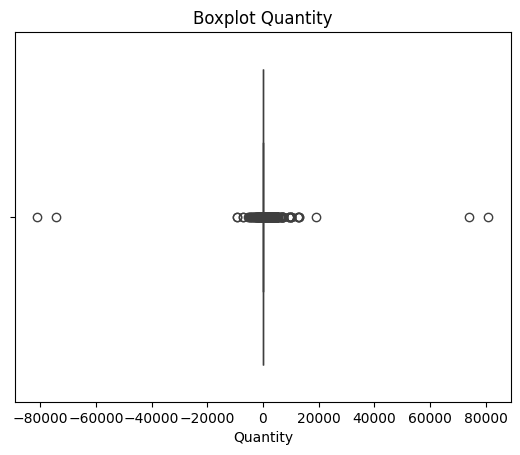

In [44]:
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot Quantity')
plt.show()

#### 13.2 Check Quantity that only not cancelled

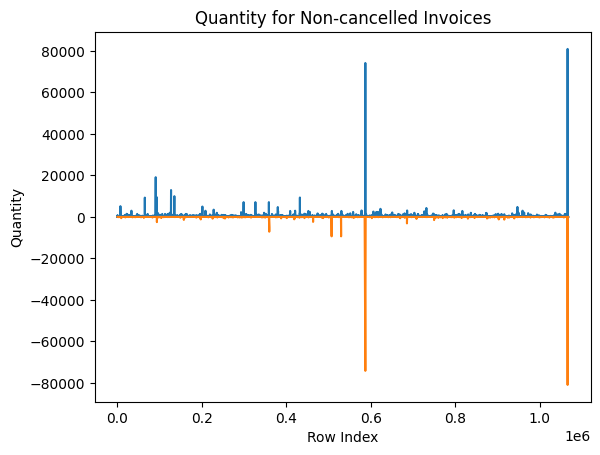

In [45]:
# Check Quantity that only not cancelled
df_not_cancelled = df[df['Invoice_cancelled'] == 0]
df_cancelled = df[df['Invoice_cancelled'] == 1]
df_not_cancelled['Quantity'].plot()
df_cancelled['Quantity'].plot()
plt.xlabel('Row Index')
plt.ylabel('Quantity')
plt.title('Quantity for Non-cancelled Invoices')
plt.show()

=> After watch that plot => Need to check `Quantity` that have value < -5000 and > 10000

#### 1.3 Check `Customer ID` have `Quantity` that have value < -5000 and > 10000

In [46]:
df_not_cancelled[df_not_cancelled['Quantity'] > 10000][['Customer ID', 'Quantity']]

,Customer ID,Quantity
90857,13902.0,19152
127166,13902.0,12960
127167,13902.0,12480
127168,13902.0,12960
127169,13902.0,12744
587080,12346.0,74215
1065882,16446.0,80995


In [47]:
df_cancelled[df_cancelled['Quantity'] < -5000][['Customer ID', 'Quantity']]

,Customer ID,Quantity
359630,14277.0,-5184
359669,14277.0,-7128
359670,14277.0,-7008
507225,15838.0,-9360
529729,15838.0,-9360
587085,12346.0,-74215
1065883,16446.0,-80995


Total `Quantity` of these `Customer ID`

In [48]:
# Lấy danh sách các Customer ID xuất hiện trong hai bảng trên
ids_lon = set(df_not_cancelled[df_not_cancelled['Quantity'] > 10000]['Customer ID']).union(
    df_cancelled[df_cancelled['Quantity'] < -5000]['Customer ID']
)

# Kiểm tra tổng Quantity của các Customer ID này trên toàn bộ dataframe
tong_quantity_ids_lon = df[df['Customer ID'].isin(ids_lon)].groupby('Customer ID')['Quantity'].sum()
print("Tổng Quantity của các Customer ID trong danh sách:")
print(tong_quantity_ids_lon)

Tổng Quantity của các Customer ID trong danh sách:
Customer ID
12346.0        24
13902.0    218088
14277.0      1891
15838.0     45825
16446.0         2
Name: Quantity, dtype: int64


=> Two `Customer ID` 12346 and 16446 have fake invoice => Remove

In [49]:
# Lọc bỏ 2 Customer ID 12346.0 và 16446.0 khỏi dataframe
df = df[~df['Customer ID'].isin([12346.0, 16446.0])]

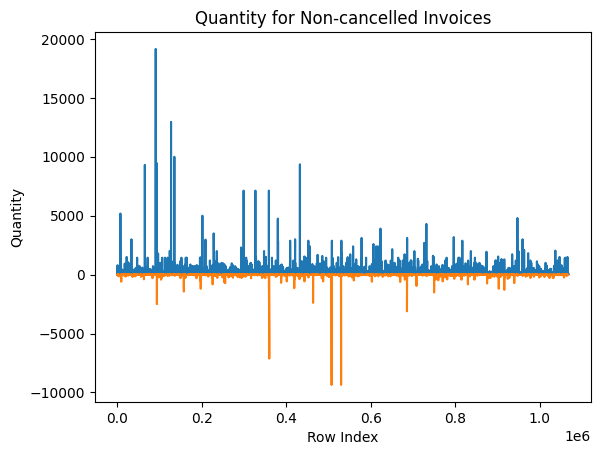

In [50]:
# Check again
df_not_cancelled = df[df['Invoice_cancelled'] == 0]
df_cancelled = df[df['Invoice_cancelled'] == 1]
df_not_cancelled['Quantity'].plot()
df_cancelled['Quantity'].plot()
plt.xlabel('Row Index')
plt.ylabel('Quantity')
plt.title('Quantity for Non-cancelled Invoices')
plt.show()

=> Look better than b4

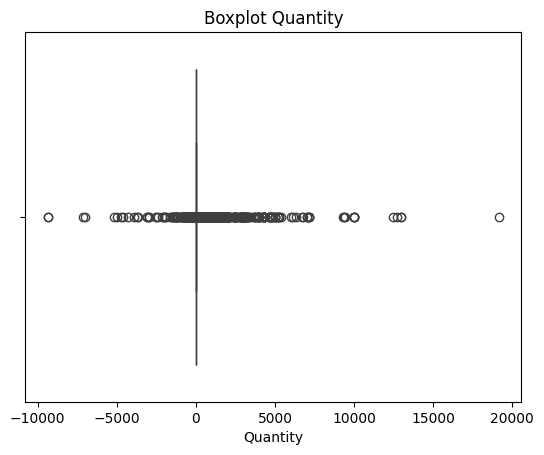

In [51]:
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot Quantity')
plt.show()

### 14. Check duplication and remove

In [52]:
# Check for duplicates based on (Invoice, StockCode, Quantity, Price, InvoiceDate)
duplicate_rows = df.duplicated(subset=['Invoice', 'StockCode', 'Quantity', 'Price', 'InvoiceDate'], keep=False)
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
# Show some examples of duplicates if any
if duplicate_rows.any():
    display(df[duplicate_rows].sort_values(['Invoice', 'StockCode', 'InvoiceDate']).head(10))


Number of duplicate rows: 66584


,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Invoice_cancelled,InvoiceMonth,InvoiceQuarter,InvoiceYear,IsExistID,Country_encoded,Revenue
379,489517,21491,1,2009-12-01 11:34:00,1.95,16329.0,0,12,4,2009,1,40,1.95
391,489517,21491,1,2009-12-01 11:34:00,1.95,16329.0,0,12,4,2009,1,40,1.95
365,489517,21821,1,2009-12-01 11:34:00,3.75,16329.0,0,12,4,2009,1,40,3.75
386,489517,21821,1,2009-12-01 11:34:00,3.75,16329.0,0,12,4,2009,1,40,3.75
363,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0,0,12,4,2009,1,40,3.75
371,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0,0,12,4,2009,1,40,3.75
394,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0,0,12,4,2009,1,40,3.75
362,489517,21913,1,2009-12-01 11:34:00,3.75,16329.0,0,12,4,2009,1,40,3.75
385,489517,21913,1,2009-12-01 11:34:00,3.75,16329.0,0,12,4,2009,1,40,3.75
368,489517,22130,6,2009-12-01 11:34:00,0.85,16329.0,0,12,4,2009,1,40,5.10


In [53]:
# Reload the processed data file to get the 'Description' column back
df_with_desc = pd.read_csv("../data/raw/data_online_retail_II.csv")

# Check for duplicates in the reloaded DataFrame based on (Invoice, StockCode, Quantity, Price, InvoiceDate)
duplicate_rows_with_desc = df_with_desc.duplicated(subset=['Invoice', 'StockCode', 'Quantity', 'Price', 'InvoiceDate'], keep=False)

# Display the 'Description' column of the duplicate rows
if duplicate_rows_with_desc.any():
    print("Descriptions of duplicate rows (from reloaded file):")
    display(df_with_desc.loc[duplicate_rows_with_desc, ['Invoice', 'StockCode', 'Quantity', 'Price', 'InvoiceDate', 'Description']].sort_values(['Invoice', 'StockCode', 'InvoiceDate']).head(10))



Descriptions of duplicate rows (from reloaded file):


,Invoice,StockCode,Quantity,Price,InvoiceDate,Description
379,489517,21491,1,1.95,2009-12-01 11:34:00,SET OF THREE VINTAGE GIFT WRAPS
391,489517,21491,1,1.95,2009-12-01 11:34:00,SET OF THREE VINTAGE GIFT WRAPS
365,489517,21821,1,3.75,2009-12-01 11:34:00,GLITTER STAR GARLAND WITH BELLS
386,489517,21821,1,3.75,2009-12-01 11:34:00,GLITTER STAR GARLAND WITH BELLS
363,489517,21912,1,3.75,2009-12-01 11:34:00,VINTAGE SNAKES & LADDERS
371,489517,21912,1,3.75,2009-12-01 11:34:00,VINTAGE SNAKES & LADDERS
394,489517,21912,1,3.75,2009-12-01 11:34:00,VINTAGE SNAKES & LADDERS
362,489517,21913,1,3.75,2009-12-01 11:34:00,VINTAGE SEASIDE JIGSAW PUZZLES
385,489517,21913,1,3.75,2009-12-01 11:34:00,VINTAGE SEASIDE JIGSAW PUZZLES
368,489517,22130,6,0.85,2009-12-01 11:34:00,PARTY CONE CHRISTMAS DECORATION


Detected 66584 row duplicated => Remove

In [54]:
df.shape

(1054479, 13)

In [55]:
# Remove duplicate rows based on (Invoice, StockCode, Quantity, Price, InvoiceDate)
df = df.drop_duplicates(subset=['Invoice', 'StockCode', 'Quantity', 'Price', 'InvoiceDate'], keep='first').reset_index(drop=True)
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (1020476, 13)


### 15. Save file `processed_data` when Data Cleaning done

In [56]:
processed_df = df.copy()
processed_df.to_csv("../data/processed/processed_data.csv", index=False)

## III. Feature Engineering

### 1. For each `StockCode`, count the number of **price levels**, assume the **lowest price** of each `StockCode` as **price_base**, analyze the price into `price_mean`, `price_min`, `price_max`, `price_std`

*Note:* `price_min` = **price_base**

**=> new features:** `num_price_level`, `price_mean`, `price_mode`, `price_min`, `price_max`, `price_std`

#### 1.1 Checking numbers of `StockCode`

In [57]:
# Check numbers of StockCode
df['StockCode'].nunique()

4877

#### 1.2 Analyze the price into `price_mean`, `price_min`, `price_max`, `price_std`

In [58]:
# Price features for each StockCode
price_agg = df.groupby('StockCode')['Price'].agg(
    num_price_level='nunique',
    price_mean='mean',
    price_min='min',
    price_max='max',
    price_std='std'
).reset_index()

price_mode = df.groupby('StockCode')['Price'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index(name='price_mode')

price_df = pd.merge(price_agg, price_mode, on='StockCode')

In [59]:
price_df.describe()

,num_price_level,price_mean,price_min,price_max,price_std,price_mode
count,4877.000000,4877.000000,4877.000000,4877.000000,4730.000000,4877.00000
mean,4.467501,4.252640,2.791409,7.528487,1.303653,3.88413
std,2.521527,7.900002,5.031768,22.235172,3.899711,8.12343
min,1.000000,0.040000,0.030000,0.040000,0.000000,0.04000
25%,3.000000,1.406160,0.720000,2.510000,0.263887,1.25000
50%,4.000000,2.525063,1.450000,4.300000,0.689624,2.10000
75%,6.000000,4.725985,3.290000,8.290000,1.434073,4.25000
max,21.000000,207.520408,145.000000,1157.150000,188.101212,295.00000


In [60]:
# Lấy danh sách StockCode có price_std bị null
stockcode_null_std = price_df.loc[price_df['price_std'].isnull(), 'StockCode']
# Hiển thị các dòng trong df có StockCode thuộc danh sách trên để kiểm tra có đúng chỉ có 1 dòng không
df[df['StockCode'].isin(stockcode_null_std)].groupby('StockCode').size()

StockCode
10109     1
16169A    1
16169G    1
16192     1
17011E    1
         ..
90004A    1
90142B    1
90142C    1
90183c    1
90184c    1
Length: 147, dtype: int64

=> `price_std` have NaN values because only 1 row of `StockCode` => Fill 0

In [61]:
# Fill NaN = 0
price_df['price_std'] = price_df['price_std'].fillna(0)

### 2. For each `StockCode`, use {`Quantity`, `InvoiceMonth`, `InvoiceYear`} to calculate the monthly demand, quarterly demand, yearly demand

#### 2.1 Calculate monthly, quarterly, and yearly demand for each `StockCode`

**Monthly Demand: Average Monthly Quantity**

Let:

- $Q_{i,y,m}$: total quantity sold of stock item $i$ in year $y$, month $m$  
- $M_i$: number of unique (year, month) combinations for item $i$

Then:

$$
\text{monthly\_sum}_{i, y, m} = \sum_{j \in \text{Invoices}_{i, y, m}} Q_j
$$

$$
\text{quantity\_monthly}_i = \frac{1}{|M_i|} \sum_{(y, m) \in M_i} \text{monthly\_sum}_{i, y, m}
$$

In [62]:
# Monthly demand: average monthly quantity sum
monthly = df.groupby(['StockCode', 'InvoiceYear', 'InvoiceMonth'])['Quantity'].sum().reset_index(name='monthly_sum')
quantity_monthly = monthly.groupby('StockCode')['monthly_sum'].mean().reset_index(name='quantity_monthly')

**Quarterly Demand: Average Quarterly Quantity**

Let:

- $Q_{i,y,q}$: total quantity sold of item $i$ in year $y$, quarter $q$  
- $Qtr_i$: number of unique (year, quarter) combinations for item $i$

Then:

$$
\text{quarterly\_sum}_{i, y, q} = \sum_{j \in \text{Invoices}_{i, y, q}} Q_j
$$

$$
\text{quantity\_quarterly}_i = \frac{1}{|Qtr_i|} \sum_{(y, q) \in Qtr_i} \text{quarterly\_sum}_{i, y, q}
$$

In [63]:
# Quarterly demand: average quarterly quantity sum
quarterly = df.groupby(['StockCode', 'InvoiceYear', 'InvoiceQuarter'])['Quantity'].sum().reset_index(name='quarterly_sum')
quantity_quarterly = quarterly.groupby('StockCode')['quarterly_sum'].mean().reset_index(name='quantity_quarterly')

**Yearly Demand: Average Yearly Quantity**

Let:

- $Q_{i,y}$: total quantity sold of item $i$ in year $y$  
- $Y_i$: number of years item $i$ has sales records

Then:

$$
\text{yearly\_sum}_{i, y} = \sum_{j \in \text{Invoices}_{i, y}} Q_j
$$

$$
\text{quantity\_yearly}_i = \frac{1}{|Y_i|} \sum_{y \in Y_i} \text{yearly\_sum}_{i, y}
$$

In [64]:
# Yearly demand: average yearly quantity sum
yearly = df.groupby(['StockCode', 'InvoiceYear'])['Quantity'].sum().reset_index(name='yearly_sum')
quantity_yearly = yearly.groupby('StockCode')['yearly_sum'].mean().reset_index(name='quantity_yearly')

#### 2.2 Merge into `features_df`

In [65]:
# Merge all features into one DataFrame
features_df = price_df.merge(quantity_monthly, on='StockCode') \
                      .merge(quantity_quarterly, on='StockCode') \
                      .merge(quantity_yearly, on='StockCode')

In [66]:
features_df.describe()

,num_price_level,price_mean,price_min,price_max,price_std,price_mode,quantity_monthly,quantity_quarterly,quantity_yearly
count,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.00000,4877.000000,4877.000000,4877.000000
mean,4.467501,4.252640,2.791409,7.528487,1.264359,3.88413,140.439044,352.897537,972.715125
std,2.521527,7.900002,5.031768,22.235172,3.846942,8.12343,297.112272,759.014257,2185.396287
min,1.000000,0.040000,0.030000,0.040000,0.000000,0.04000,-39.000000,-39.000000,-39.000000
25%,3.000000,1.406160,0.720000,2.510000,0.212519,1.25000,10.777778,22.000000,48.000000
50%,4.000000,2.525063,1.450000,4.300000,0.659685,2.10000,46.173913,106.500000,261.500000
75%,6.000000,4.725985,3.290000,8.290000,1.399828,4.25000,139.571429,345.375000,930.000000
max,21.000000,207.520408,145.000000,1157.150000,188.101212,295.00000,5140.200000,11606.555556,34819.666667


In [67]:
features_df.to_csv("../data/processed/data_stockcode_grouped.csv", index=False)

## V. Visualize

### 1. Total sales over time

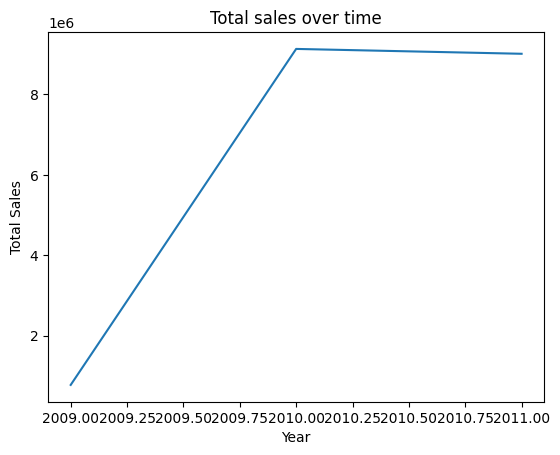

In [68]:
df_clean = df.copy()

df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['Price']
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
total_sales_by_year = df_clean.groupby('Year')['TotalPrice'].sum()

# Use Seaborn to plot the total sales over time
sns.lineplot(x=total_sales_by_year.index, y=total_sales_by_year.values)
plt.title("Total sales over time")
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

### 2. Analyze which **customers** have higher average transaction values (`TotalPrice`) or quantities (`Quantity`)

In [69]:
# Group the data by customer and calculate the mean for 'TotalPrice' and 'Quantity'
mean_price_by_customer = df_clean.groupby('Customer ID')['TotalPrice'].mean()
mean_quantity_by_customer = df_clean.groupby('Customer ID')['Quantity'].mean()

# Combine into a single dataframe
df_avgtranq = pd.concat([mean_price_by_customer, mean_quantity_by_customer], axis=1)
df_avgtranq.columns = ['avgCustomerPrice', 'avgCustomerQuantity']

# Show top 10 customers with the highest average transaction value
print("Top 10 customers with the highest average transaction value:")
print(df_avgtranq.sort_values('avgCustomerPrice', ascending=False).head(10))

# Show top 10 customers with the highest average transaction quantity
print("\nTop 10 customers with the highest average transaction quantity:")
print(df_avgtranq.sort_values('avgCustomerQuantity', ascending=False).head(10))

# Plot scatter plot for average transaction value and quantity per customer
fig = px.scatter(
    df_avgtranq,
    x='avgCustomerPrice',
    y='avgCustomerQuantity',
    title='Average Transaction Value and Quantity per Customer',
    labels={'avgCustomerPrice': 'Average Value per Customer', 'avgCustomerQuantity': 'Average Quantity per Customer'}
)
fig.show()

Top 10 customers with the highest average transaction value:
             avgCustomerPrice  avgCustomerQuantity
Customer ID                                       
15098.0           9904.875000            15.250000
15195.0           3861.000000          1404.000000
13205.0           2803.200000           256.000000
16532.0           1459.440000           424.000000
15749.0           1435.726667           600.933333
16000.0           1377.077778           567.777778
17369.0            979.200000          1152.000000
18133.0            931.500000          1350.000000
12503.0            896.000000           560.000000
17940.0            860.290303          2580.181818

Top 10 customers with the highest average transaction quantity:
             avgCustomerPrice  avgCustomerQuantity
Customer ID                                       
13902.0            467.311692          3355.200000
17940.0            860.290303          2580.181818
16308.0            731.428571          2285.714286
13687.0

### 3. Analyze which **products** have higher average transaction values (`TotalPrice`) or quantities (`Quantity`)


In [70]:
# Calculate average transaction value and average quantity per product (StockCode)
mean_price_by_product = df_clean.groupby('StockCode')['TotalPrice'].mean()
mean_quantity_by_product = df_clean.groupby('StockCode')['Quantity'].mean()

# Combine into a DataFrame
df_avgtranq_product = pd.concat([mean_price_by_product, mean_quantity_by_product], axis=1)
df_avgtranq_product.columns = ['avgProductPrice', 'avgProductQuantity']

# Show top 10 products with the highest average transaction value
print("Top 10 products with the highest average transaction value:")
print(df_avgtranq_product.sort_values('avgProductPrice', ascending=False).head(10))

# Show top 10 products with the highest average quantity per transaction
print("\nTop 10 products with the highest average quantity per transaction:")
print(df_avgtranq_product.sort_values('avgProductQuantity', ascending=False).head(10))

# Plot scatter plot for average transaction value and average quantity per product
fig = px.scatter(
    df_avgtranq_product,
    x='avgProductPrice',
    y='avgProductQuantity',
    title='Average Transaction Value and Quantity per Product',
    labels={'avgProductPrice': 'Average Value per Product', 'avgProductQuantity': 'Average Quantity per Product'}
)
fig.show()



Top 10 products with the highest average transaction value:
           avgProductPrice  avgProductQuantity
StockCode                                     
22790          3884.000000          200.000000
84760L          896.000000          560.000000
84964B          495.000000            8.500000
85220           461.335714         1389.000000
15059A          391.750000          127.250000
35915A          365.760000          288.000000
84965A          350.000000            6.666667
84965B          339.987500            6.750000
22833           320.272308            9.230769
84964A          315.000000            5.500000

Top 10 products with the highest average quantity per transaction:
           avgProductPrice  avgProductQuantity
StockCode                                     
16044           129.740000         2064.333333
85220           461.335714         1389.000000
37410            96.504412          755.911765
85218           206.950000          663.000000
37352            63.068750

### 4. Analyze and visualize total `Revenue` and number of transactions for years 2010 and 2011


In [71]:
# Ensure InvoiceDate column is in datetime format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Add necessary time columns
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Week'] = df_clean['InvoiceDate'].dt.isocalendar().week
df_clean['Day'] = df_clean['InvoiceDate'].dt.date
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

# Total revenue by year
sales_per_year = df_clean.groupby('Year')['TotalPrice'].sum().reset_index()
fig = px.bar(
    sales_per_year,
    x='Year',
    y='TotalPrice',
    color='Year',
    title='Total Revenue by Year',
    labels={'TotalPrice': 'Total Revenue', 'Year': 'Year'}
)
fig.show()

# Total revenue by month, separated by year
sales_per_month_year = df_clean.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
fig = px.bar(
    sales_per_month_year,
    x='Month',
    y='TotalPrice',
    color='Year',
    barmode='group',
    title='Total Revenue by Month (by Year)',
    labels={'TotalPrice': 'Total Revenue', 'Month': 'Month', 'Year': 'Year'}
)
fig.show()

# Number of transactions by week, separated by year
transactions_per_week_year = df_clean.groupby(['Year', 'Week'])['Invoice'].nunique().reset_index()
fig = px.bar(
    transactions_per_week_year,
    x='Week',
    y='Invoice',
    color='Year',
    barmode='group',
    title='Number of Transactions by Week (by Year)',
    labels={'Invoice': 'Number of Transactions', 'Week': 'Week', 'Year': 'Year'}
)
fig.show()

# Number of transactions by day, separated by year
transactions_per_day_year = df_clean.groupby(['Year', 'Day'])['Invoice'].nunique().reset_index()
fig = px.line(
    transactions_per_day_year,
    x='Day',
    y='Invoice',
    color='Year',
    title='Number of Transactions by Day (by Year)',
    labels={'Invoice': 'Number of Transactions', 'Day': 'Day', 'Year': 'Year'}
)
fig.show()

# Number of transactions by hour, separated by year
transactions_per_hour_year = df_clean.groupby(['Year', 'Hour'])['Invoice'].nunique().reset_index()
fig = px.bar(
    transactions_per_hour_year,
    x='Hour',
    y='Invoice',
    color='Year',
    barmode='group',
    title='Number of Transactions by Hour in Day (by Year)',
    labels={'Invoice': 'Number of Transactions', 'Hour': 'Hour', 'Year': 'Year'}
)
fig.show()


## VI. Checking data

### 1. Data cleaned:

In [72]:
df_clean

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Invoice_cancelled,InvoiceMonth,InvoiceQuarter,InvoiceYear,IsExistID,Country_encoded,Revenue,TotalPrice,Year,Month,Week,Day,Hour
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,0,12,4,2009,1,40,83.40,83.40,2009,12,49,2009-12-01,7
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,0,12,4,2009,1,40,81.00,81.00,2009,12,49,2009-12-01,7
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,0,12,4,2009,1,40,81.00,81.00,2009,12,49,2009-12-01,7
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,0,12,4,2009,1,40,100.80,100.80,2009,12,49,2009-12-01,7
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,0,12,4,2009,1,40,30.00,30.00,2009,12,49,2009-12-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020471,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,0,12,4,2011,1,14,10.20,10.20,2011,12,49,2011-12-09,12
1020472,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,0,12,4,2011,1,14,12.60,12.60,2011,12,49,2011-12-09,12
1020473,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,0,12,4,2011,1,14,16.60,16.60,2011,12,49,2011-12-09,12
1020474,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,0,12,4,2011,1,14,16.60,16.60,2011,12,49,2011-12-09,12


### 2. Data featured:

In [73]:
features_df

,StockCode,num_price_level,price_mean,price_min,price_max,price_std,price_mode,quantity_monthly,quantity_quarterly,quantity_yearly
0,10002,5,0.975348,0.72,1.70,0.306715,0.85,438.117647,1064.000000,2482.666667
1,10002R,2,5.133333,5.06,5.17,0.063509,5.17,2.000000,2.000000,2.000000
2,10080,2,0.505000,0.39,0.85,0.202841,0.39,28.636364,45.000000,105.000000
3,10109,1,0.420000,0.42,0.42,0.000000,0.42,4.000000,4.000000,4.000000
4,10120,2,0.239730,0.21,0.43,0.075724,0.21,30.190476,70.444444,211.333333
...,...,...,...,...,...,...,...,...,...,...
4872,90214U,2,0.770000,0.29,1.25,0.678823,0.29,6.500000,6.500000,6.500000
4873,90214V,4,0.952500,0.29,1.25,0.241827,0.83,2.375000,4.750000,19.000000
4874,90214W,4,0.872500,0.29,1.25,0.300179,0.83,2.714286,3.800000,9.500000
4875,90214Y,4,0.852000,0.29,1.25,0.350929,0.83,9.714286,17.000000,34.000000


In [74]:
fig = px.scatter(
    features_df,
    x='price_min',
    y='quantity_monthly',
    opacity=0.3,
    labels={
        'price_min': 'Giá nhỏ nhất (price_min)',
        'quantity_monthly': 'Số lượng trung bình theo tháng (quantity_monthly)'
    },
    title='Mối quan hệ giữa Số lượng trung bình theo tháng và Giá nhỏ nhất',
    hover_data=['StockCode']  # Thêm StockCode vào thông tin hiển thị khi hover
)
fig.update_layout(
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    width=1000,
    height=600
)
fig.show()